# Azure OpenAI Configuration

Add your [Azure Open AI Service key](https://learn.microsoft.com/azure/cognitive-services/openai/quickstart?pivots=programming-language-studio) settings to a `.env` file in the same folder:

```
AZURE_OPENAI_API_KEY="..."
AZURE_OPENAI_ENDPOINT="https://..."
AZURE_OPENAI_DEPLOYMENT_NAME="..."
```

and add Azure OpenAI Text Completion to the kernel

## Semantic Kernel version: semantic-kernel    0.3.1.dev0

In [1]:
import os
from dotenv import load_dotenv
# load AZURE_OPENAI_ENDPOINT, AZURE_OPENAI_API_KEY, OPENAI_API_VERSION and AZURE_OPENAI_API_TYPE
# plus COMPLETION4_DEPLOYMENT, to be assigned to the MODEL string
# plus BING_SUBSCRIPTION_KEY and BING_SEARCH_URL

load_dotenv("./../credentials_my.env")
MODEL = os.environ["GPT432-0613-32k"] 

from langchain.chat_models import AzureChatOpenAI
from langchain.embeddings import AzureOpenAIEmbeddings

llm = AzureChatOpenAI(deployment_name=MODEL, temperature=0, max_tokens=1000)
embeddings_model = AzureOpenAIEmbeddings(deployment=os.environ["EMBEDDING_DEPLOYMENT"])

In [2]:
import os
from dotenv import load_dotenv

load_dotenv("./credentials_my.env")

from langchain.embeddings import AzureOpenAIEmbeddings

embeddings_model = AzureOpenAIEmbeddings(deployment=os.environ["EMBEDDING_DEPLOYMENT"])

In [14]:
embedding_vector = embeddings_model.embed_query("porcine pals")
[round(embedding_vector[i],3) for i in [0,1,2,-1]]

[-0.011, -0.011, 0.032, -0.011]

Bad pipe message: %s [b'f\x97-\xab8l\xfcE\x8fK\xc9\xfee,\xc4\x9c\xed\x05 \x11\x8aL\x1f\x80}\x86\x9c\xa9\xef\xb9\x87']
Bad pipe message: %s [b'\x0fnR\xdaf3\x85\x08\xb3A=\x03M\xe7\xea\xa6\x96K\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00']
Bad pipe message: %s [b'\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 P2(8\x9a\xbf*>f\xaf\xb1v\xb1]\xb8:E\xc7#\x19z\x06\x18\xc3@\xd6\xa0\x9c\\\x1cAc']
Bad pipe message: %s [b'/\xa6\x9c\x89\xb6\x16F\x9e\xd3J\x1e\xb8\x0cd\xf9\x86\xbc\xef\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac', b"\xc0\x9e\xc0\\\xc0`\xc0V\

[-0.027, -0.001, 0.02, -0.023]

In [4]:
len(embedding_vector)

1536

# Calculate Word Embeddings
To use word embeddings for semantic search, you first compute the embeddings for a corpus of text using a word embedding algorithm. What does this mean? We are going to create a numerical representation of each of these words. To perform this computation, we'll use OpenAI's 'get_embedding' function.

Since we have our words in a pandas dataframe, we can use "apply" to apply the get_embedding function to each row in the dataframe. We then store the calculated word embeddings in a new text file called "word_embeddings.csv" so that we don't have to call OpenAI again to perform these calculations.

# Learn how to generate embeddings with Azure OpenAI
https://learn.microsoft.com/en-us/azure/cognitive-services/openai/how-to/embeddings?tabs=console

In [5]:
import numpy as np
embeddings = embeddings_model.embed_query("coniglio")
print(f"embeddings shape: {np.array(embeddings).shape}. Now showing the first 5 elements:\n{embeddings[:5]}")

embeddings shape: (1536,). Now showing the first 5 elements:
[-0.0043827086426748265, -0.0010006808596196939, 0.007116668500927373, -0.03562842736550295, -0.017530834570699306]


# Cosine similarity
https://en.wikipedia.org/wiki/Cosine_similarity
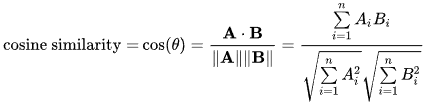

In [6]:
v1 = np.array([1,2,3])
v2 = np.array([4,5,6])
numerator = np.dot(v1,v2) # 4+10+18
numerator

32

In [7]:
denominator_1 = np.linalg.norm(v1) # sqrt (1+4+9) = 3.74
denominator_2 = np.linalg.norm(v2) # sqrt (16+25+36) = 8.77
denominator   = denominator_1 * denominator_2
denominator

32.83291031876401

In [8]:
print(numerator / denominator)

0.9746318461970762


In [10]:
def cosine_similarity(v1,v2):
    numerator = np.dot(v1,v2)
    denumerator = np.linalg.norm(v1) * np.linalg.norm(v2)
    return numerator / denumerator

cosine_similarity(np.array([1,2,3]),np.array([4,5,6]))

0.7309738846478072

In [11]:
cosine_similarity(np.array([1,2,3,-1,2,3,-1,2,3,-1,2,3]),np.array([-4,5,6,4,5,-6,4,5,-6,4,5,6]))

0.1827434711619518

## Create an embedding for a single word

In [12]:
#openai.Embedding.create(input="rabbit", engine=azure_openai_deployment_emb)['data'][0]['embedding']
embeddings_model.embed_query("rabbit")

[-0.0068422129567413835,
 -0.022518674587143118,
 -0.018874114945419834,
 -0.008764961065998386,
 -0.017460633593012205,
 0.00995671872112636,
 -0.006000361119633828,
 -0.03176172545454789,
 -0.02379357886158161,
 -0.014439668008182216,
 0.019830292685587406,
 0.009443986512872895,
 0.00940934224338061,
 -0.023363991409993463,
 -0.00213407754780024,
 -0.005917214965984608,
 0.03084712009271298,
 -0.0003518542904241112,
 0.018583104571800818,
 0.0021964370466218295,
 0.004631918528285551,
 -0.0077879971366644875,
 -0.019275986236356075,
 -0.027950872574203565,
 -0.01790407912492631,
 -0.006603168521699491,
 0.017419061214679548,
 -0.0035787372526347593,
 -0.006623955176527121,
 -0.01359435118533187,
 0.005477234885474596,
 -0.001560717402273977,
 -0.026468104545456575,
 -0.0313737103812924,
 -0.015187980131396085,
 -0.013823002060129298,
 0.024001444478535312,
 -0.009298480394740783,
 0.014120941473911292,
 0.012471882069188464,
 0.022726540204096816,
 0.017917937205252265,
 -0.00077039

## Check distance between two words

In [15]:
v1 = embeddings_model.embed_query("coniglio")
v2 = embeddings_model.embed_query("elefante")

cosine_similarity(v1,v2)

0.8738565579825985

# Read Data File Containing Words
Now that we have configured OpenAI, let's start with a simple CSV file with familiar words

In [16]:
import pandas as pd
file_name = 'words'
df = pd.read_csv(f'{file_name}.csv')
print(df)

            text
0            red
1       potatoes
2           soda
3         cheese
4          water
5           blue
6         crispy
7      hamburger
8         coffee
9          green
10          milk
11      la croix
12        yellow
13     chocolate
14  french fries
15         latte
16          cake
17         brown
18  cheeseburger
19      espresso
20    cheesecake
21         black
22         mocha
23         fizzy
24        carbon
25        banana


In [17]:
try:    
    #df["text_embeddings"] = df["text"].apply(lambda x: openai.Embedding.create(input=x, engine=azure_openai_deployment_emb)['data'][0]['embedding'])
    df["text_embeddings"] = df["text"].apply(lambda x: embeddings_model.embed_query(x))
    df.to_pickle(f"{file_name}_enriched.pkl") # type(df['embeddings'][0][0]) --> float  
except:
    #print('switching to pickle file...')
    df = pd.read_pickle(f"{file_name}_enriched.pkl")

df

,text,text_embeddings
0,red,"[1.8579007769542794e-05, -0.024676262768476977..."
1,potatoes,"[0.00502584641607942, -0.031079445022430187, 0..."
2,soda,"[0.025859493238686276, -0.0074522843718128765,..."
3,cheese,"[-0.003942061665143823, -0.009351087695777676,..."
4,water,"[0.019031281205231232, -0.012577433504912215, ..."
5,blue,"[0.005434895494128161, -0.007299471773025037, ..."
6,crispy,"[-0.0010056837940389323, -0.005415475002884491..."
7,hamburger,"[-0.013206876306753617, -0.0018223669033289507..."
8,coffee,"[-0.0007566261981429599, -0.01945229299584776,..."
9,green,"[0.015384600128779406, -0.010931522323256773, ..."


In [18]:
search_term = input ('Insert a search term:\n') # hot dog

#search_term_vector = openai.Embedding.create(input=search_term, engine=azure_openai_deployment_emb)['data'][0]['embedding']
search_term_vector = embeddings_model.embed_query(search_term)
df["similarity"] = df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
df

Insert a search term:
hot dog


,text,text_embeddings,similarity
0,red,"[1.8579007769542794e-05, -0.024676262768476977...",0.812070
1,potatoes,"[0.00502584641607942, -0.031079445022430187, 0...",0.816856
2,soda,"[0.025859493238686276, -0.0074522843718128765,...",0.820797
3,cheese,"[-0.003942061665143823, -0.009351087695777676,...",0.824127
4,water,"[0.019031281205231232, -0.012577433504912215, ...",0.798268
5,blue,"[0.005434895494128161, -0.007299471773025037, ...",0.786934
6,crispy,"[-0.0010056837940389323, -0.005415475002884491...",0.820502
7,hamburger,"[-0.013206876306753617, -0.0018223669033289507...",0.876765
8,coffee,"[-0.0007566261981429599, -0.01945229299584776,...",0.799683
9,green,"[0.015384600128779406, -0.010931522323256773, ...",0.785477


In [19]:
df.sort_values("similarity", ascending=False)

,text,text_embeddings,similarity
7,hamburger,"[-0.013206876306753617, -0.0018223669033289507...",0.876765
18,cheeseburger,"[-0.018216601857833137, 0.0050543554196311995,...",0.856907
14,french fries,"[0.001447668347501641, -0.01649173590569388, 0...",0.838477
3,cheese,"[-0.003942061665143823, -0.009351087695777676,...",0.824127
2,soda,"[0.025859493238686276, -0.0074522843718128765,...",0.820797
6,crispy,"[-0.0010056837940389323, -0.005415475002884491...",0.820502
1,potatoes,"[0.00502584641607942, -0.031079445022430187, 0...",0.816856
13,chocolate,"[0.0015591585694544046, -0.013005273543038934,...",0.816746
0,red,"[1.8579007769542794e-05, -0.024676262768476977...",0.812070
16,cake,"[-0.013669421814750194, -0.016827936398999006,...",0.811998


In [20]:
search_term = "torta"
#search_term_vector = openai.Embedding.create(input=search_term, engine=azure_openai_deployment_emb)['data'][0]['embedding']
search_term_vector = embeddings_model.embed_query(search_term)

df["similarity"] = df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
df = df.sort_values("similarity", ascending=False)
df

,text,text_embeddings,similarity
16,cake,"[-0.013669421814750194, -0.016827936398999006,...",0.869387
20,cheesecake,"[0.011245745536054398, -0.012743036480745939, ...",0.862098
15,latte,"[-0.015634098448049014, -0.00394283965667647, ...",0.834910
3,cheese,"[-0.003942061665143823, -0.009351087695777676,...",0.832558
13,chocolate,"[0.0015591585694544046, -0.013005273543038934,...",0.828894
22,mocha,"[-0.01248759246631373, -0.02614051714549489, -...",0.827499
19,espresso,"[-0.02250584372915874, -0.012747502725610215, ...",0.826370
25,banana,"[-0.013975119495881564, -0.03290277784867423, ...",0.822562
7,hamburger,"[-0.013206876306753617, -0.0018223669033289507...",0.817686
1,potatoes,"[0.00502584641607942, -0.031079445022430187, 0...",0.814486


# Campaign Speeches

In [21]:
file_name = 'discorso_presidente_del_consiglio'

df = pd.read_csv(f'{file_name}.csv')

df

,text
0,"Signor Presidente, onorevoli colleghi, sono in..."
1,Sono i momenti fondanti della nostra democrazi...
2,La celerità di questi giorni era per noi non s...
3,Tra i tanti pesi che sento gravare sulle mie s...
4,Ma il mio ringraziamento più sentito non può n...
5,"Intendiamo farlo, assumendoci pienamente i dir..."
6,Ci siamo presentati in campagna elettorale con...
7,L'Italia è a pieno titolo parte dell'Occidente...
8,Permettetemi innanzitutto di ringraziare i ver...
9,Perché è quello il luogo in cui l'Italia farà ...


In [22]:
try:
    df["text_embeddings"] = df["text"].apply(lambda x: 
       # openai.Embedding.create(input=x, engine=azure_openai_deployment_emb)['data'][0]['embedding'])
       embeddings_model.embed_query(x))
    df.to_pickle(f"{file_name}_enriched.pkl") # type(df['embeddings'][0][0]) --> float
    df.to_csv(f"{file_name}_enriched.csv") # type(df['embeddings'][0][0]) --> string

except:
    print("switching to pickle file...")
    df = pd.read_pickle(f"{file_name}_enriched.pkl")
    
df

,text,text_embeddings
0,"Signor Presidente, onorevoli colleghi, sono in...","[0.011699427559432147, -0.01791354969273762, -..."
1,Sono i momenti fondanti della nostra democrazi...,"[-0.015981372941766058, -0.007984190495723499,..."
2,La celerità di questi giorni era per noi non s...,"[-0.014787789601394263, -0.015619603109897871,..."
3,Tra i tanti pesi che sento gravare sulle mie s...,"[-0.026252127485929422, -0.03395771144951077, ..."
4,Ma il mio ringraziamento più sentito non può n...,"[-0.010774982455188016, -0.020595962824907128,..."
5,"Intendiamo farlo, assumendoci pienamente i dir...","[-0.006782023875022171, -0.023271267230148218,..."
6,Ci siamo presentati in campagna elettorale con...,"[-0.00356276633556571, -0.022593794234851076, ..."
7,L'Italia è a pieno titolo parte dell'Occidente...,"[0.017813619871800843, -0.016094649973599225, ..."
8,Permettetemi innanzitutto di ringraziare i ver...,"[-0.004608835833918491, -0.012601621857856312,..."
9,Perché è quello il luogo in cui l'Italia farà ...,"[0.002637751242963084, -0.007966168680451477, ..."


In [25]:
# accoglienza profughi extracomunitari --> flussi migratori, traffico di essere umani, immigrazione
# a quali gruppi appartiene l'Italia?
search_term = input ('Insert a search term:\n')

#search_term_vector = openai.Embedding.create(input=search_term, engine=azure_openai_deployment_emb)['data'][0]['embedding']
search_term_vector = embeddings_model.embed_query(search_term)

df["similarity"] = df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
df.sort_values("similarity", ascending=False).head(5)

Insert a search term:
Quali sono le donne italiane che hanno dimostrato valore?


,text,text_embeddings,similarity
3,Tra i tanti pesi che sento gravare sulle mie s...,"[-0.026252127485929422, -0.03395771144951077, ...",0.872225
42,"Ho iniziato a fare politica a 15 anni, il gior...","[-0.007430465487848082, -0.010723438202758076,...",0.823429
13,L'Alleanza Atlantica garantisce alle nostre de...,"[-0.0005410254852734614, -0.011724501926690953...",0.816146
27,Penso alla favorevole posizione dell'Italia ne...,"[-0.008135038845829954, -0.0096501983070658, 0...",0.808335
40,"Da allora, la comunità politica da cui proveng...","[-0.00023834475435064101, -0.01525406427844102...",0.806481


## Generalize top paragraphs identification

In [26]:
def top_paragraphs_identification (search_term, top_terms=5):
    # search_term_vector = openai.Embedding.create(input=search_term, engine=azure_openai_deployment_emb)['data'][0]['embedding']
    search_term_vector = embeddings_model.embed_query(search_term)
    df["similarity"] = df["text_embeddings"].apply(lambda x: cosine_similarity(x,search_term_vector))
    return df.sort_values("similarity", ascending=False).head(top_terms)


# possible questions:
# "A quali gruppi appartiene l'Italia?"
# "Che cosa hanno fatto le Forze Armate?"
# "Quali sono le donne italiane che hanno dimostrato valore?"
# "Quali sono le grandi sfide dell'Unione Europea?"
# "Quale strada vuole perseguire il governo?"

question = "Quali sono le donne italiane che hanno dimostrato valore?"
best_paragraphs_df = top_paragraphs_identification(question)
best_paragraph_nr = best_paragraphs_df.index[0]
best_paragraph_text = best_paragraphs_df["text"][best_paragraph_nr]
print(f"The best answer should be in paragraph #{best_paragraph_nr}:\n{best_paragraph_text}")

The best answer should be in paragraph #3:
Tra i tanti pesi che sento gravare sulle mie spalle oggi, non può non esserci anche quello di essere la prima donna a capo del governo in questa Nazione. Quando mi soffermo sulla portata di questo fatto, mi ritrovo inevitabilmente a pensare alla responsabilità che ho di fronte alle tante donne che in questo momento affrontano difficoltà grandi e ingiuste per affermare il proprio talento o il diritto di vedere apprezzati i loro sacrifici quotidiani. Ma penso anche, con riverenza, a coloro che hanno costruito con le assi del proprio esempio la scala che oggi consente a me di salire e rompere il pesante tetto di cristallo posto sulle nostre teste. Donne che hanno osato, per impeto, per ragione, o per amore. Come Cristina (Trivulzio di Belgioioso), elegante organizzatrice di salotti e barricate. O come Rosalie (Montmasson), testarda al punto da partire con i Mille che fecero l'Italia. Come Alfonsina (Strada) che pedalò forte contro il vento del pr

# Semantic Kernel in Action!
## Import Semantic Kernel SDK from pypi.org

In [ ]:
# !python -m pip install -r requirements.txt (semantic-kernel 0.3.1.dev0 on 27/06/2023)

import semantic_kernel as sk

kernel_emb = sk.Kernel()
kernel_txt = sk.Kernel()

# retrieve environment variables for Open AI
azure_openai_deployment_txt, azure_openai_api_key, azure_openai_endpoint = sk.azure_openai_settings_from_dot_env()

from semantic_kernel.connectors.ai.open_ai import AzureTextCompletion

kernel_txt.add_text_completion_service(azure_openai_deployment_txt, 
    AzureTextCompletion(
        azure_openai_deployment_txt, 
        azure_openai_endpoint, 
        azure_openai_api_key))

kernel_txt.set_default_text_completion_service(azure_openai_deployment_txt)

# print(f"deployment:\t{azure_openai_deployment_txt}\napi_key:\t{azure_openai_api_key}\nendpoint:\t{azure_openai_endpoint}")
print(f"deployment:\t{azure_openai_deployment_txt}\napi_key:\t*****\nendpoint:\t{azure_openai_endpoint}")

## Two ways to create a semantic function

In [ ]:
skills_directory    = "./skills"
skills_dataset_name = "mauromi_skills"
skill_name          = "find_and_search_function"

# method 1 - import the skills library
mauromi_skills = kernel_txt.import_semantic_skill_from_directory(skills_directory, skills_dataset_name)
find_and_search_function = mauromi_skills[skill_name]

# method 2 - use the skill text as prompt
prompt = open(os.path.join(skills_directory, skills_dataset_name, skill_name, "skprompt.txt")).read()
find_and_search_function = kernel_txt.create_semantic_function(prompt)

## Let's call *find_and_search_function* semantic function
BEAWARE: as a result of calling the execution of run_async, we get the following situation:
```
context_variables["input"] == output.result
```
that is the mechanism to create a chaining

In [ ]:
# in this case we use the same question and "best paragraph" identified above

context_variables = sk.ContextVariables()
context_variables["question"] = question

answer = find_and_search_function(input=best_paragraph_text, variables=context_variables)

print(f"Question: {question}\n\nAnswer from paragraph {best_paragraph_nr}:\n{answer.result.lstrip('.').lstrip()}")

## Same test, but this time we use *kernel.run_async* that is useful for chaining
**ContextVariables** is the same collection object used above, to which we need to add the "input" variable

In [ ]:
context_variables["input"] = best_paragraph_text

# beaware: 
output = await kernel_txt.run_async(find_and_search_function, input_vars=context_variables)
print(f"Question: {question}\n\nAnswer from paragraph {best_paragraph_nr}:\n{output.result.lstrip('.').lstrip()}")

## Chain multiple semantic functions

### Recall: the base of the chaining is based on the following assumption:
```
context_variables["input"] == output.result
```


## In this case, we use two skills
This code still does NOT use either:
- PLANNER --> this means that we manually concatenate the functions in the kernel.run_async method()
- NATIVE function --> so at the moment we can't concatenate the semantic function with the cosine similarity function. This means that <best_paragraph_text> is the 33th paragraph (#32)

https://learn.microsoft.com/en-us/semantic-kernel/howto/chainingfunctions

In [ ]:
# possible questions:
# "A quali gruppi appartiene l'Italia?"
# "Che cosa hanno fatto le Forze Armate?"
# "Quali sono le donne italiane che hanno dimostrato valore?"
# "Quali sono le grandi sfide dell'Unione Europea?"

# set context variables
question                      = "Che cosa hanno fatto le Forze Armate?"
context_variables             = sk.ContextVariables()
context_variables["style"]    = 'se non trovi la risposta nel testo, rispondi NON LO SO'
context_variables["question"] = question

# identify the answer using embeddings
best_paragraphs_df            = top_paragraphs_identification(question)
best_paragraph_nr             = best_paragraphs_df.index[0]
best_paragraph_text           = best_paragraphs_df["text"][best_paragraph_nr]
context_variables["input"]    = best_paragraph_text

# import functions
find_and_search_function      = mauromi_skills['find_and_search_function']
translate_function            = mauromi_skills['translate_function']

# chained output
await kernel_txt.run_async(find_and_search_function, input_vars=context_variables) # translate_function,
print(f"Question: {question}\n\nAnswer from paragraph {best_paragraph_nr}:\n{context_variables['input'].lstrip('.').lstrip()}")

## Let's add a NATIVE FUNCTION

In our example, we'll create one file with two functions (uppercase and lowercase).
We'll create a single Python files for them, which must be called "native_function.py".

In [ ]:
# possible questions:
# A quali gruppi appartiene l'Italia?
# Che cosa hanno fatto le Forze Armate?
# Quali sono le donne italiane che hanno dimostrato valore?
# Quali sono le grandi sfide dell'Unione Europea?

# set context variables
question                      = "A quali gruppi appartiene l'Italia?"
context_variables             = sk.ContextVariables()
context_variables["style"]    = 'se non trovi la risposta nel testo, rispondi NON LO SO'
context_variables["question"] = question

# identify the answer using embeddings
best_paragraphs_df            = top_paragraphs_identification(question)
best_paragraph_nr             = best_paragraphs_df.index[0]
best_paragraph_text           = best_paragraphs_df["text"][best_paragraph_nr]
context_variables["input"]    = best_paragraph_text

# import semantic functions
find_and_search_function      = mauromi_skills['find_and_search_function']
translate_function            = mauromi_skills['translate_function']

# import native functions
native_skills_dataset_name    = "mauromi_native_skills"
native_skills_file_name       = os.path.join(skills_directory,native_skills_dataset_name,'native_function.py')
mauromi_native_functions      = kernel_txt.import_native_skill_from_directory(
                                parent_directory=skills_directory, skill_directory_name=native_skills_dataset_name)
textcase_function             = mauromi_native_functions['uppercase'] # uppercase or lowercase

# chained output
await kernel_txt.run_async(find_and_search_function, translate_function, textcase_function, input_vars=context_variables)
print(f"Question: {question}\n\nAnswer from paragraph {best_paragraph_nr}:\n{context_variables['input'].lstrip('.').lstrip()}")